In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
# to upload and read data in google colab
import re
import io
from google.colab import files
from google.colab import drive
# for graph
import seaborn as sns
import matplotlib.pyplot as plt
# ML preparation
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
# ML
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Embedding, Dense, Flatten
# avoid overfitting
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
# evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
# for fine tuning
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
uploaded = files.upload()

Saving Preprocessed_data.csv to Preprocessed_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Preprocessed_data.csv']))
df.head()

Unnamed: 0                                            Answer   Manual1   \
0           0  Komputer adalah serangkaian ataupun sekelompok...        60   
1           2  mesin yang membantu manusia untuk menjalankan ...        30   
2           3  Komputer adalah alat komputasi yang diciptakan...        12   
3           5  Komputer adalah alat yang dipakai untuk mengol...        20   
4           6  komputer merupakan alat untuk mengolah data. m...        40   

   Manual2  Manual3  Topic  Normalised  \
0       95       75      3    0.857495   
1       20       25      3    0.437903   
2       10       10      3    0.253458   
3       30       25      3    0.437903   
4       40       50      3    0.612290   

                                         CleanAnswer  \
0  komputer adalah serangkaian ataupun sekelompok...   
1  mesin yang membantu manusia untuk menjalankan ...   
2  komputer adalah alat komputasi yang diciptakan...   
3  komputer adalah alat yang dipakai untuk mengol...   
4  komputer merupakan alat untuk mengolah data me...   

                                                Stem  \
0  komputer adalah rangkai atau kelompok mesin el...   
1  mesin yang bantu manusia untuk jalan segara kerja   
2  komputer adalah alat komputasi yang cipta untu...   
3  komputer adalah alat yang pakai untuk olah dat...   
4  komputer rupa alat untuk olah data laku hitung...   

                                              Tokens  char_count  word_count  \
0  ['komputer', 'rangkai', 'kelompok', 'mesin', '...         359          47   
1  ['mesin', 'bantu', 'manusia', 'jalan', 'segara...          62           8   
2  ['komputer', 'alat', 'komputasi', 'cipta', 'hi...          87          12   
3  ['komputer', 'alat', 'pakai', 'olah', 'data', ...         486          63   
4  ['komputer', 'rupa', 'alat', 'olah', 'data', '...         137          17   

   avg_word_len  spell_err_count  
0      7.638298                0  
1      7.750000                0  
2      7.250000                1  
3      7.714286                2  
4      8.058824                1

In [ ]:
df.describe()

Unnamed: 0     Manual1       Manual2      Manual3        Topic  \
count  1780.000000  1780.000000  1780.000000  1780.000000  1780.000000   
mean   1069.300562    41.752247    45.084831    45.466292     1.458427   
std     619.269325    24.441091    28.311566    26.640793     1.103911   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     548.750000    23.000000    25.000000    25.000000     0.000000   
50%    1049.000000    38.000000    40.000000    50.000000     1.000000   
75%    1598.250000    55.000000    65.000000    50.000000     2.000000   
max    2161.000000   100.000000   100.000000   100.000000     3.000000   

        Normalised   char_count   word_count  avg_word_len  spell_err_count  
count  1780.000000  1780.000000  1780.000000   1780.000000      1780.000000  
mean      0.586395   199.014045    27.449438      7.291289         4.165730  
std       0.225437   263.799169    36.667309      0.877851         6.061337  
min       0.000000    27.000000     5.000000      4.555556         0.000000  
25%       0.430574    82.000000    11.000000      6.750000         1.000000  
50%       0.598110   127.000000    18.000000      7.250000         2.000000  
75%       0.718265   213.000000    29.000000      7.750000         6.000000  
max       1.000000  4061.000000   543.000000     15.625000        90.000000

In [ ]:
x = df['Stem']
y = df['Normalised']

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

1335 1335
445 445


In [ ]:
text = df['Stem']
label = df['Normalised']

# Calculating the total vocabulary
tk = Tokenizer()
tk.fit_on_texts(text)

vocab = len(tk.word_index)+1
vocab

3902

In [ ]:
# Maximum length
max_len = np.max(df['Stem'].apply(lambda x: len(x.split())).values)
max_len

543

In [ ]:
def embedding(text):
    return tk.texts_to_sequences(text)

train_padded = pad_sequences(embedding(text), max_len, padding='post')
train_padded

array([[  44,    3,  261, ...,    0,    0,    0],
       [ 407,    1,   96, ...,    0,    0,    0],
       [  44,    3,  102, ...,    0,    0,    0],
       ...,
       [  31, 3900,  461, ...,    0,    0,    0],
       [  78,   60, 2073, ...,    0,    0,    0],
       [ 476,  461,  166, ...,    0,    0,    0]], dtype=int32)

In [ ]:
uploadg = files.upload()

Saving glove_id.txt to glove_id.txt


In [ ]:
embedding_dict = dict()
embedding_dim = 50

# Each word is represented in one line in the text file
with open('glove_id.txt', 'r') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector = np.asarray(records[1:], dtype='float32')
        embedding_dict[word] = vector

In [ ]:
# Creating a matrix for each word as index (word numerical value extracted from tokenizer
# with N-features (corresponding to GloVe)
# We will replace the matrix elements by the words and their embeddings

# Our embeddings will also consist embeddings for padding
embedding_matrix = np.zeros((vocab, embedding_dim))

for word, index in tk.word_index.items():
    embed_vector = embedding_dict.get(word)
    if embed_vector is not None:
        embedding_matrix[index] = embed_vector

embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.94551009e-01, -9.95750010e-01,  7.57867992e-01, ...,
         1.51862705e+00,  2.50085306e+00,  5.41719019e-01],
       [ 4.31110002e-02, -4.15558994e-01,  9.01297987e-01, ...,
         1.46225500e+00,  2.83015990e+00,  1.90399995e-03],
       ...,
       [ 3.85024995e-01, -6.25168025e-01, -2.66265988e-01, ...,
         1.06702000e-01,  2.28465006e-01,  1.14261001e-01],
       [ 1.22408998e+00, -3.88428986e-01,  7.20369995e-01, ...,
         1.36417997e+00,  1.46054900e+00,  9.32929993e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
# NN and GloVe embedding
train_padded.shape

(1780, 543)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_padded, label, test_size=0.2)

In [ ]:
# Plotting the results
def learning_curve(history, arr):
    fig, ax=plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]])
        ax[idx].set_xlabel('Epochs')
        ax[idx].set_ylabel('Value')
        ax[idx].set_title(arr[idx][0]+' X '+ arr[idx][1])

In [ ]:
def create_model(learning_rate = 0.01, activation = 'relu'):
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=max_len))
    model.add(Dense(60, activation=activation))
    model.add(Dense(30, activation=activation))
    model.add(Flatten(input_shape=(max_len, 1)))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=opt, metrics=['mae'])
    return model

# Fine tuning
# Create a KerasRegressor
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)
# Define the parameters to try out
params = {'activation': ["relu", "tanh"],
          'batch_size': [10, 20, 30],
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(10))
random_search_results = random_search.fit(x_train, y_train)

<ipython-input-15-5f4f5544e6fd>:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.022501158807426692 and Best Params:  {'learning_rate': 0.001, 'epochs': 50, 'batch_size': 10, 'activation': 'relu'}


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=max_len))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Flatten(input_shape=(max_len, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

print(model.summary())

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_101 (Embedding)   (None, 543, 50)           195100    
                                                                 
 dense_303 (Dense)           (None, 543, 60)           3060      
                                                                 
 dense_304 (Dense)           (None, 543, 30)           1830      
                                                                 
 flatten_101 (Flatten)       (None, 16290)             0         
                                                                 
 dense_305 (Dense)           (None, 1)                 16291     
                                                                 
Total params: 216,281
Trainable params: 216,281
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', vactor=0.1, verbose=1, patience=5, min_lr=0.0001)
stopearly = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)

history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test), verbose=1, callbacks=[reduce_lr, stopearly])

model.save('regr_model.h5')

Epoch 1/100
143/143 [==============================] - 3s 14ms/step - loss: 0.0679 - mae: 0.1761 - val_loss: 0.0275 - val_mae: 0.1229 - lr: 0.0010
Epoch 2/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0473 - mae: 0.1336 - val_loss: 0.0222 - val_mae: 0.1162 - lr: 0.0010
Epoch 3/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0260 - mae: 0.1092 - val_loss: 0.0201 - val_mae: 0.1113 - lr: 0.0010
Epoch 4/100
143/143 [==============================] - 3s 21ms/step - loss: 0.0144 - mae: 0.0876 - val_loss: 0.0165 - val_mae: 0.0974 - lr: 0.0010
Epoch 5/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0107 - mae: 0.0773 - val_loss: 0.0165 - val_mae: 0.1002 - lr: 0.0010
Epoch 6/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0084 - mae: 0.0669 - val_loss: 0.0152 - val_mae: 0.0954 - lr: 0.0010
Epoch 7/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0075 - mae: 0.0626 - val_loss: 0.0169 - 

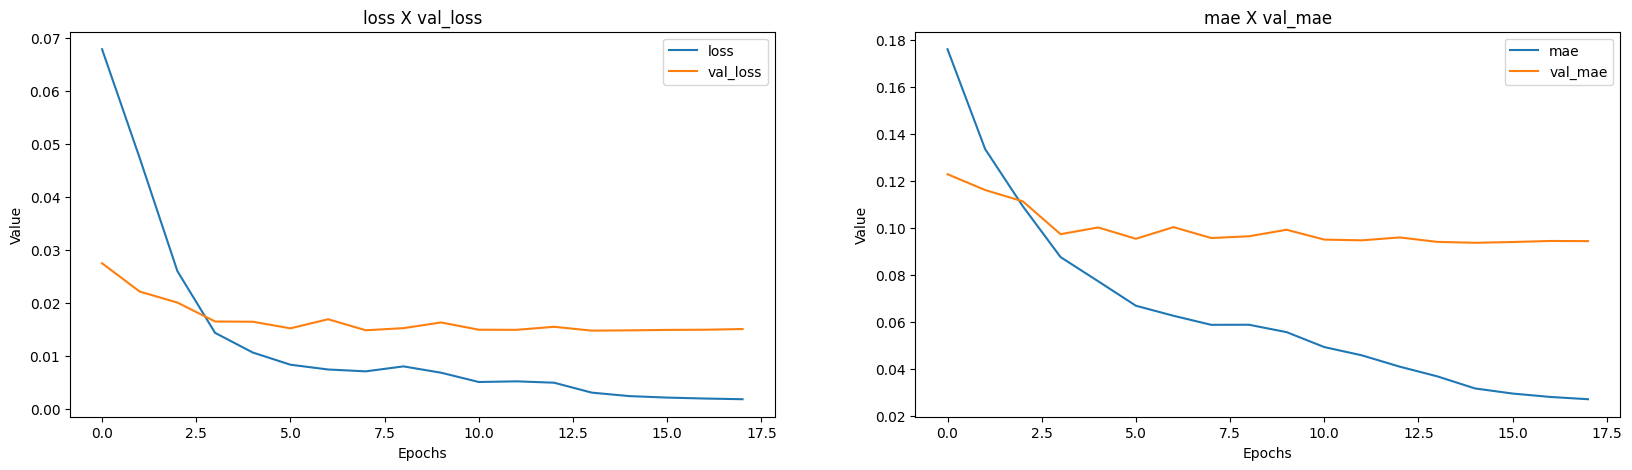

In [ ]:
learning_curve(history, [['loss', 'val_loss'], ['mae', 'val_mae']])

In [ ]:
yp = model.predict(x_test)
yp

12/12 [==============================] - 0s 8ms/step


array([[0.48622152],
       [0.8110368 ],
       [0.3725019 ],
       [0.75291014],
       [0.2925391 ],
       [0.67926776],
       [0.92006373],
       [0.5729114 ],
       [0.66858435],
       [0.9332894 ],
       [0.29637486],
       [0.2649899 ],
       [0.5957184 ],
       [0.4488917 ],
       [0.3906462 ],
       [0.9440346 ],
       [0.52931106],
       [0.923229  ],
       [0.6698439 ],
       [0.23718072],
       [0.58377314],
       [0.4975711 ],
       [0.9252838 ],
       [0.585322  ],
       [0.4761264 ],
       [0.28381115],
       [0.55626595],
       [0.38094234],
       [0.70551264],
       [0.58900285],
       [0.5539218 ],
       [0.5796113 ],
       [0.44312817],
       [0.49550512],
       [0.4367155 ],
       [0.8025025 ],
       [0.64699626],
       [0.70941937],
       [0.5080719 ],
       [0.2784825 ],
       [0.38110402],
       [0.5789983 ],
       [0.28189468],
       [0.6440226 ],
       [0.73302174],
       [0.7992996 ],
       [0.7280284 ],
       [0.478